In [620]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import collections

# special matplotlib argument for improved plots
from matplotlib import rcParams
import seaborn as sns

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (20, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [621]:
patient = pd.read_csv('Patient_Profile.csv')
health_camp = pd.read_csv('Health_Camp_Detail.csv')
first = pd.read_csv('First_Health_Camp_Attended.csv')
second = pd.read_csv('Second_Health_Camp_Attended.csv')
third = pd.read_csv('Third_Health_Camp_Attended.csv')
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('sample.csv')

In [622]:
train['train'] = 1
test['train'] = 0

In [623]:
combine = pd.concat([train, test])

In [624]:
health_camp['Camp_Start_Date'] = pd.to_datetime(health_camp['Camp_Start_Date'])
health_camp['Camp_End_Date'] = pd.to_datetime(health_camp['Camp_End_Date'])
health_camp['Camp_Duration'] = (health_camp['Camp_End_Date']-health_camp['Camp_Start_Date']).dt.days

health_camp['Category2'][health_camp['Category2'].isin(['A','D','B'])] = 'Combine'

combine = pd.merge(combine, health_camp, on = 'Health_Camp_ID', how = 'left')

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [625]:
combine['Registration_Date'] = pd.to_datetime(combine['Registration_Date'], coerce = True)

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':


In [72]:
# combine = combine[~combine['Registration_Date'].isnull()]

In [626]:
combine['Registration_Date'][combine['Registration_Date'].isnull()] = combine['Camp_Start_Date'][combine['Registration_Date'].isnull()]

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [627]:
combine = combine.sort('Registration_Date')

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [628]:
combine['Registered_Till_Now'] = 0

In [629]:
combine = combine.reset_index()

In [630]:
df = combine['Patient_ID'].value_counts().reset_index()
df[df['Patient_ID']>1].shape

(19151, 2)

In [631]:
combine[(combine.index<10) & (combine['Patient_ID']==489605)]['Patient_ID'].count()

0

In [632]:
for index,row in combine[combine['Patient_ID'].isin(df['index'][df['Patient_ID']>1])].iterrows():
    combine.set_value(index, 'Registered_Till_Now', combine[(combine.index<index) & (combine['Patient_ID']==row['Patient_ID'])]['Patient_ID'].count())

In [633]:
combine['Registered_For_Camp_Till_Now'] = 0

In [634]:
for index,row in combine.iterrows():
    combine.set_value(index, 'Registered_For_Camp_Till_Now', combine[(combine.index<index) & (combine['Health_Camp_ID']==row['Health_Camp_ID'])]['Health_Camp_ID'].count())

In [635]:
first = first[first.columns[:4]]

In [636]:
# combine.to_csv('Main.csv', index = False)
#combine = pd.read_csv('Main.csv')

In [637]:
# train.shape[0]+test.shape[0]

In [638]:
first['Outcome'] = 1
second['Outcome'] = 1
third["Outcome"] = 0
third['Outcome'][third['Number_of_stall_visited']>0] = 1

In [639]:
to_add = pd.concat([first[['Patient_ID','Health_Camp_ID','Outcome']], second[['Patient_ID','Health_Camp_ID','Outcome']], third[['Patient_ID','Health_Camp_ID','Outcome']]])
to_add = to_add[to_add['Outcome']!=0]

combine = pd.merge(combine, to_add, on = ['Patient_ID','Health_Camp_ID'], how = 'left')

In [640]:
combine['Outcome'].fillna(0, inplace = True)

In [641]:
combine.isnull().sum()

index                           0
Patient_ID                      0
Health_Camp_ID                  0
Registration_Date               0
Var1                            0
Var2                            0
Var3                            0
Var4                            0
Var5                            0
train                           0
Camp_Start_Date                 0
Camp_End_Date                   0
Category1                       0
Category2                       0
Category3                       0
Camp_Duration                   0
Registered_Till_Now             0
Registered_For_Camp_Till_Now    0
Outcome                         0
dtype: int64

In [642]:
test['Registration_Date'] = pd.to_datetime(test['Registration_Date'])

In [643]:
combine = pd.merge(combine, patient, on = "Patient_ID", how = 'left')

In [644]:
for c in ['Registration_Date','Camp_Start_Date','Camp_End_Date','First_Interaction']:
    combine[c] = pd.to_datetime(combine[c])

In [645]:
combine['Reg_To_Camp_Start'] = (combine['Camp_Start_Date']-combine['Registration_Date']).dt.days
combine['Reg_To_Camp_End'] = (combine['Camp_End_Date']-combine['Registration_Date']).dt.days

#combine['First_Interaction'] = pd.to_datetime(combine['First_Interaction'])

combine['Int_To_Reg'] = (combine['Registration_Date']-combine['First_Interaction']).dt.days

In [646]:
combine['Education_Score'][combine['Education_Score']=='None'] = -999
combine['Education_Score'] = combine['Education_Score'].astype(float)

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1]:
# combine.isnull().sum()

In [2]:
# combine.dtypes

In [649]:
combine['Age'][combine['Age']=='None'] = -999

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [650]:
combine['Income'][combine['Age']=='None'] = -999

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [651]:
combine['Var4'].value_counts()
combine['Var4'][combine['Var4'].isin([4,5,6,8])] = 4

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [652]:
# combine.groupby('Var5')['Outcome'].mean()

In [653]:
#combine['Var_new1'] = np.log(1+combine['Var1'])
combine['Var_new4'] = combine['Var4'].astype(str)

In [654]:
combine.dtypes

index                                    int64
Patient_ID                               int64
Health_Camp_ID                           int64
Registration_Date               datetime64[ns]
Var1                                     int64
Var2                                     int64
Var3                                     int64
Var4                                     int64
Var5                                     int64
train                                    int64
Camp_Start_Date                 datetime64[ns]
Camp_End_Date                   datetime64[ns]
Category1                               object
Category2                               object
Category3                                int64
Camp_Duration                            int64
Registered_Till_Now                      int64
Registered_For_Camp_Till_Now             int64
Outcome                                float64
Online_Follower                          int64
LinkedIn_Shared                          int64
Twitter_Share

In [655]:
combine.columns

Index([u'index', u'Patient_ID', u'Health_Camp_ID', u'Registration_Date',
       u'Var1', u'Var2', u'Var3', u'Var4', u'Var5', u'train',
       u'Camp_Start_Date', u'Camp_End_Date', u'Category1', u'Category2',
       u'Category3', u'Camp_Duration', u'Registered_Till_Now',
       u'Registered_For_Camp_Till_Now', u'Outcome', u'Online_Follower',
       u'LinkedIn_Shared', u'Twitter_Shared', u'Facebook_Shared', u'Income',
       u'Education_Score', u'Age', u'First_Interaction', u'City_Type',
       u'Employer_Category', u'Reg_To_Camp_Start', u'Reg_To_Camp_End',
       u'Int_To_Reg', u'Var_new4'],
      dtype='object')

In [656]:
combine.shape

(110527, 33)

In [657]:
combine[(combine['train']==1) & (combine['Camp_Start_Date']>'2005-06-06')].shape

(39789, 33)

In [658]:
combine['Camp_Start_Month'] = combine['Camp_Start_Date'].dt.month
combine['Camp_End_Month'] = combine['Camp_End_Date'].dt.month

In [659]:
combine["Age"] = combine['Age'].astype(int)

In [857]:
cont = [u'Var1', u'Var2', u'Var3',u'Var5', u'train', 
       u'Registered_Till_Now', u'Registered_For_Camp_Till_Now', u'Outcome',
       u'Category3', u'Camp_Duration', u'Online_Follower', u'LinkedIn_Shared',
       u'Twitter_Shared', u'Facebook_Shared', 
       u'Reg_To_Camp_Start', u'Reg_To_Camp_End', u'Int_To_Reg','Age','Education_Score']

cat = [ u'Category1', u'Category2','Income','Employer_Category']

extra = ['Registration_Date']

In [858]:
#for h in combine['Health_Camp_ID'].unique():
for c in cont:
    print c
    combine[c].fillna(combine[c].median(), inplace = True)

Var1
Var2
Var3
Var5
train
Registered_Till_Now
Registered_For_Camp_Till_Now
Outcome
Category3
Camp_Duration
Online_Follower
LinkedIn_Shared
Twitter_Shared
Facebook_Shared
Reg_To_Camp_Start
Reg_To_Camp_End
Int_To_Reg
Age
Education_Score


In [3]:
# combine.isnull().sum()

In [860]:
# health_camp[health_camp['Health_Camp_ID'].isin(combine[combine['train']==1]['Health_Camp_ID'].unique())]

In [4]:
# combine[combine['Health_Camp_ID'].isin([6528,6529,6541,6534])].shape

In [5]:
# combine['Var14'] = combine['Var1']*combine['Var5']
# combine[['Var1','Var5','Var14']].corr()

In [863]:
combine['Social'] = combine['LinkedIn_Shared']+combine['Twitter_Shared']+combine['Facebook_Shared']

In [864]:
combine['Var_Total'] = combine['Var1']+combine['Var2']+combine['Var5']

In [866]:
to_train = combine[combine['train']==1]
to_test = combine[combine['train']==0]

In [867]:
cont = [ u'Var2', u'Var3',  'Var5','Var1',
       u'Registered_Till_Now', u'Registered_For_Camp_Till_Now', 
       u'Category3', u'Camp_Duration', u'Online_Follower', u'LinkedIn_Shared',
       u'Twitter_Shared', u'Facebook_Shared', 
       u'Reg_To_Camp_Start', u'Reg_To_Camp_End', u'Int_To_Reg'
       , 'Age','Education_Score','Social','Var_Total'
       ]

cat = [ u'Category1', u'Category2', u'Income','City_Type','Var_new4','Employer_Category']

In [868]:
X = pd.get_dummies(to_train[cat])
X[cont] = to_train[cont]
X[extra] = to_train[extra]

y = to_train['Outcome']

#X = X.drop('Income_-1', axis = 1)
#X = X.drop('City_Type_-1', axis = 1)

In [869]:
# combine['Var4'].value_counts()

In [870]:
for c in [u'Income_None']:
    X = X.drop(c, axis = 1)

In [871]:
# 'colsample_bytree': 0.9, 'silent': 0, 'min_child_weight': 6.0, 'n_estimators': 468.0, 'subsample': 0.55, 'eta': 0.025, 'objective': 'binary:logistic', 'max_depth': 3.0, 'gamma': 0.8, 'booster': 'gbtree'}

In [872]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify = y, random_state = 42)
X_train = X[X['Registration_Date']>'2005-06-06']
X_test = X[X['Registration_Date']<='2005-06-06']
y_train = y[X_train.index]
y_test = y[X_test.index]
X_train = X_train.drop('Registration_Date', axis = 1)
X_test = X_test.drop('Registration_Date', axis = 1)

# X_train = X[~X['Health_Camp_ID'].isin([6528,6529,6541,6534])]
# X_test = X[X['Health_Camp_ID'].isin([6528,6529,6541,6534])]
# y_train = y[X_train.index]
# y_test = y[X_test.index]
# X_train = X_train.drop('Health_Camp_ID', axis = 1)
# X_test = X_test.drop('Health_Camp_ID', axis = 1)


#X = X.drop('Health_Camp_ID', axis = 1)
X = X.drop('Registration_Date', axis = 1)


import xgboost as xgb
params = {"objective": "binary:logistic",
          "booster" : "gbtree",
          "eta": 0.08,
          "max_depth": 3,
          'gamma':0.7,
          "subsample": 0.7,
          "colsample_bytree": 1,
          'min_child_weight':4,
          "silent": 1,
          "seed": 1301,
          'eval_metric':'auc'
          }
num_boost_round = 300

print("Train a XGBoost model")
#dtrain = xgb.DMatrix(X_train, y_train)
dtrain = xgb.DMatrix(X, y)
#dvalid = xgb.DMatrix(X_test, y_test)

# watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
#    early_stopping_rounds=50, verbose_eval=True)
gbm = xgb.train(params, dtrain, num_boost_round)

# # from sklearn.metrics import roc_auc_score
# # roc_auc_score(y_test,gbm.predict(xgb.DMatrix(X_test)))

Train a XGBoost model


In [873]:
X_test = pd.get_dummies(to_test[cat])
X_test[cont] = to_test[cont]

X_test = X_test.drop('Income_None', axis = 1)

test['Outcome'] = 0

In [874]:
# pd.DataFrame(gbm.predict(xgb.DMatrix(X_test)))

In [876]:
to_test = to_test.reset_index()
to_test['Outcome'] = pd.DataFrame(gbm.predict(xgb.DMatrix(X_test)))

In [877]:
# to_test[sample.columns]

In [878]:
to_test[sample.columns].to_csv('final4.csv', index = False)

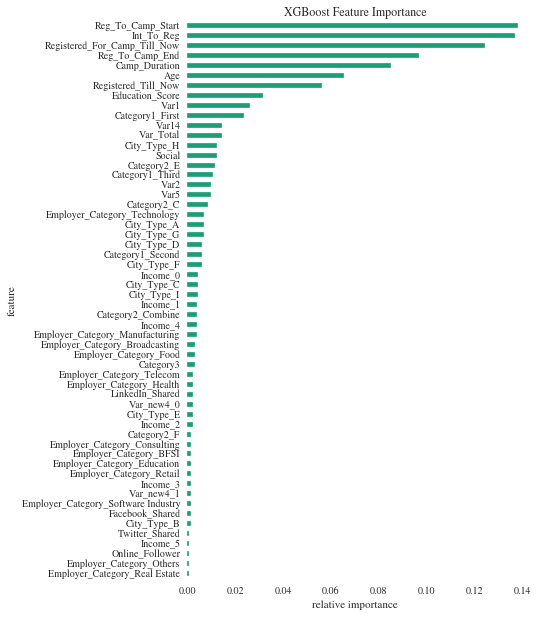

In [760]:
import operator

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()

create_feature_map(X_train.columns)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

featp = df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
fig_featp = featp.get_figure()

In [702]:
# X = pd.get_dummies(to_train[cat])
# X[cont] = to_train[cont]
# X[extra] = to_train[extra]

y = to_train['Outcome']

#X = X.drop('Income_-1', axis = 1)
#X = X.drop('City_Type_-1', axis = 1)

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score
    
import xgboost as xgb


def score(params):
    print "Training with params : "
    print params
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
    #dvalid = xgb.DMatrix(X_test[X_train.columns], label=y_test)
    # watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round)
    score = roc_auc_score(y_test,model.predict(xgb.DMatrix(X_test)))
    print "\tScore {0}\n\n".format(score)
    return {'loss': -score, 'status': STATUS_OK}


def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'eta' : hp.quniform('eta', 0.025, 0.5, 0.025),
             'max_depth' : hp.quniform('max_depth', 1, 7, 1),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'objective': 'binary:logistic',
             'silent' : 0,
            "booster" : "gbtree",
            }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=400)

    print best

    
X_train = X[X['Registration_Date']>'2005-06-06']
X_test = X[X['Registration_Date']<='2005-06-06']
y_train = y[X_train.index]
y_test = y[X_test.index]
X_train = X_train.drop('Registration_Date', axis = 1)
X_test = X_test.drop('Registration_Date', axis = 1)

#Trials object where the history of search will be stored
trials = Trials()

optimize(trials)

Training with params : 
{'colsample_bytree': 1.0, 'silent': 0, 'min_child_weight': 3.0, 'n_estimators': 358.0, 'subsample': 0.8500000000000001, 'eta': 0.225, 'objective': 'binary:logistic', 'max_depth': 4.0, 'gamma': 0.8500000000000001, 'booster': 'gbtree'}
	Score 0.756057850949


Training with params : 
{'colsample_bytree': 0.8500000000000001, 'silent': 0, 'min_child_weight': 6.0, 'n_estimators': 771.0, 'subsample': 0.55, 'eta': 0.15000000000000002, 'objective': 'binary:logistic', 'max_depth': 4.0, 'gamma': 0.7000000000000001, 'booster': 'gbtree'}
	Score 0.747490929291


Training with params : 
{'colsample_bytree': 0.75, 'silent': 0, 'min_child_weight': 7.0, 'n_estimators': 152.0, 'subsample': 0.75, 'eta': 0.4, 'objective': 'binary:logistic', 'max_depth': 2.0, 'gamma': 0.55, 'booster': 'gbtree'}
	Score 0.759303358779


Training with params : 
{'colsample_bytree': 0.8, 'silent': 0, 'min_child_weight': 2.0, 'n_estimators': 215.0, 'subsample': 0.55, 'eta': 0.2, 'objective': 'binary:logis

KeyboardInterrupt: 